In [1]:
import pandas as pd

def get_tickers(path):
    companies = pd.read_csv(path)
    ticker_list = list(companies['Ticker'])
    print('Retrieved', str(len(ticker_list)), 'ticker symbols.')
    return ticker_list


In [4]:
import quandl
quandl.ApiConfig.api_key = 'wXfCHqCS861H4wT8YB9s'

def get_prices(ticker):
    print('Retrieving data for', ticker)
    prices = quandl.get('WIKI/' + ticker)['Adj. Close'].reset_index()
    prices['Ticker'] = ticker
    return prices

data = []

ticker_list = get_tickers('/Users/erinberardi/Downloads/companies.csv')

for ticker in ticker_list:
    prices = get_prices(ticker)
    data.append(prices)

    


Retrieved 30 ticker symbols.
Retrieving data for AAPL
Retrieving data for NFLX
Retrieving data for AMZN
Retrieving data for MSFT
Retrieving data for GOOG
Retrieving data for TSLA
Retrieving data for FB
Retrieving data for AAP
Retrieving data for DIS
Retrieving data for NKE
Retrieving data for UA
Retrieving data for BAC
Retrieving data for CCL
Retrieving data for CI
Retrieving data for AAL
Retrieving data for LUV
Retrieving data for WFC
Retrieving data for WMT
Retrieving data for HD
Retrieving data for ORCL
Retrieving data for IBM
Retrieving data for NCLH
Retrieving data for RCL
Retrieving data for TWX
Retrieving data for FOX
Retrieving data for F
Retrieving data for GCI
Retrieving data for XOM
Retrieving data for WWE
Retrieving data for WM


In [18]:

def concat_pivot(data, rows, columns, values):
    df = pd.concat(data, sort=True)
    pivot = df.pivot_table(values=values, columns=columns, index=rows)
    return pivot


[           Date  Adj. Close Ticker
0    1980-12-12    0.422706   AAPL
1    1980-12-15    0.400652   AAPL
2    1980-12-16    0.371246   AAPL
3    1980-12-17    0.380362   AAPL
4    1980-12-18    0.391536   AAPL
...         ...         ...    ...
9395 2018-03-21  171.270000   AAPL
9396 2018-03-22  168.845000   AAPL
9397 2018-03-23  164.940000   AAPL
9398 2018-03-26  172.770000   AAPL
9399 2018-03-27  168.340000   AAPL

[9400 rows x 3 columns],            Date  Adj. Close Ticker
0    2002-05-23    1.196429   NFLX
1    2002-05-24    1.210000   NFLX
2    2002-05-28    1.157143   NFLX
3    2002-05-29    1.103571   NFLX
4    2002-05-30    1.071429   NFLX
...         ...         ...    ...
3983 2018-03-21  316.480000   NFLX
3984 2018-03-22  306.700000   NFLX
3985 2018-03-23  300.940000   NFLX
3986 2018-03-26  320.350000   NFLX
3987 2018-03-27  300.690000   NFLX

[3988 rows x 3 columns],            Date   Adj. Close Ticker
0    1997-05-16     1.729167   AMZN
1    1997-05-19     1.708333   AMZN

In [6]:
def compute_returns(df):
    returns = df.pct_change()
    return returns


In [17]:
def return_risk_ratio(df, days=30):
    means = pd.DataFrame(df.tail(days).mean())
    std = pd.DataFrame(df.tail(days).std())
    ratios = pd.concat([means, std], axis=1).reset_index()
    ratios.columns = ['Company', 'Mean', 'Std']
    ratios['Ratio'] = ratios['Mean']/ratios['Std']
    return ratios



NameError: name 'df' is not defined

In [19]:
top10 = ratios.sort_values('Ratio', ascending=False).head(10)


In [ ]:
def corr_matrix(df, days=30):
    corr_matrix = df.tail(days).corr()
    return corr_matrix

target_list = returns[list(top10['Company'])]
correlation = corr_matrix(target_list)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def barchart(df, x, y, length=8, width=14, title=""):
    df = df.sort_values(x, ascending=False)
    plt.figure(figsize=(width,length))
    chart = sns.barplot(data=df, x=x, y=y)
    plt.title(title + "\n", fontsize=16)
    return chart

bar_plot = barchart(top10, 'Ratio', 'Company', title='Stock Return vs. Risk Ratios')


In [ ]:
import numpy as np

def correlation_plot(corr, title=""):
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    plt.subplots(figsize=(15, 10))
    cmap = sns.diverging_palette(6, 255, as_cmap=True)
    
    chart = sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=.5, annot=True, fmt='.2f')
    plt.title(title, fontsize=16)
    return chart

corr_plot = correlation_plot(correlation, title='Stock Return Correlation')


In [ ]:
def save_viz(chart, title):
    fig = chart.get_figure()
    fig.savefig(title + '.png')


Retrieved 30 ticker symbols.
Retrieving data for AAPL
Retrieving data for NFLX
Retrieving data for AMZN
Retrieving data for MSFT
Retrieving data for GOOG
Retrieving data for TSLA
Retrieving data for FB
Retrieving data for AAP
Retrieving data for DIS
Retrieving data for NKE
Retrieving data for UA
Retrieving data for BAC
Retrieving data for CCL
Retrieving data for CI
Retrieving data for AAL
Retrieving data for LUV
Retrieving data for WFC
Retrieving data for WMT
Retrieving data for HD
Retrieving data for ORCL
Retrieving data for IBM
Retrieving data for NCLH
Retrieving data for RCL
Retrieving data for TWX
Retrieving data for FOX
Retrieving data for F
Retrieving data for GCI
Retrieving data for XOM
Retrieving data for WWE
Retrieving data for WM


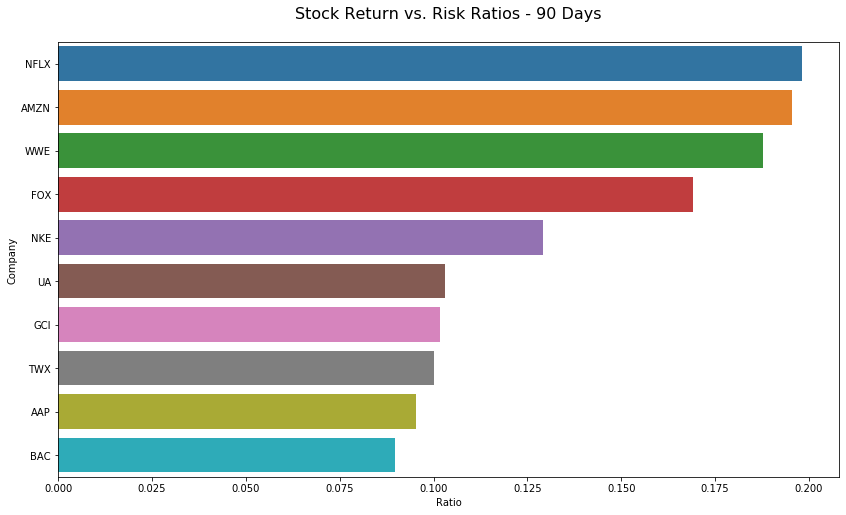

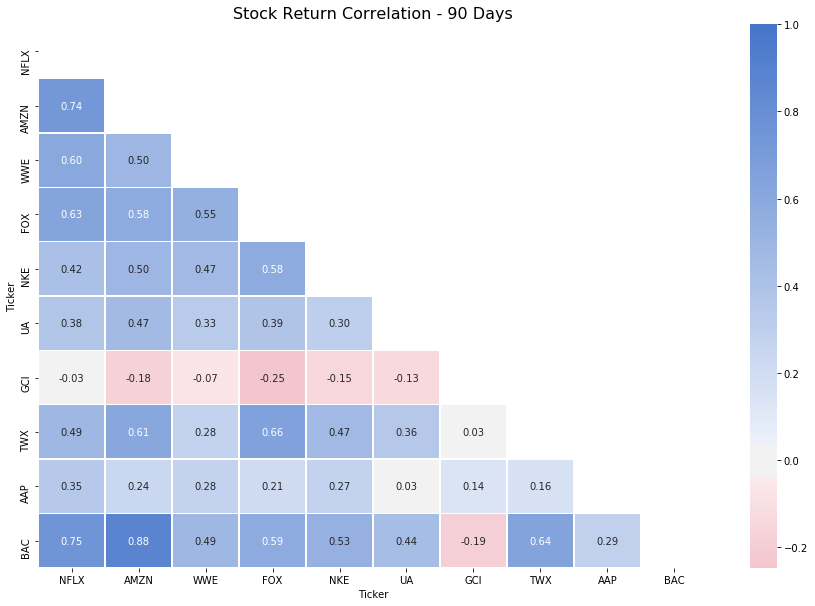

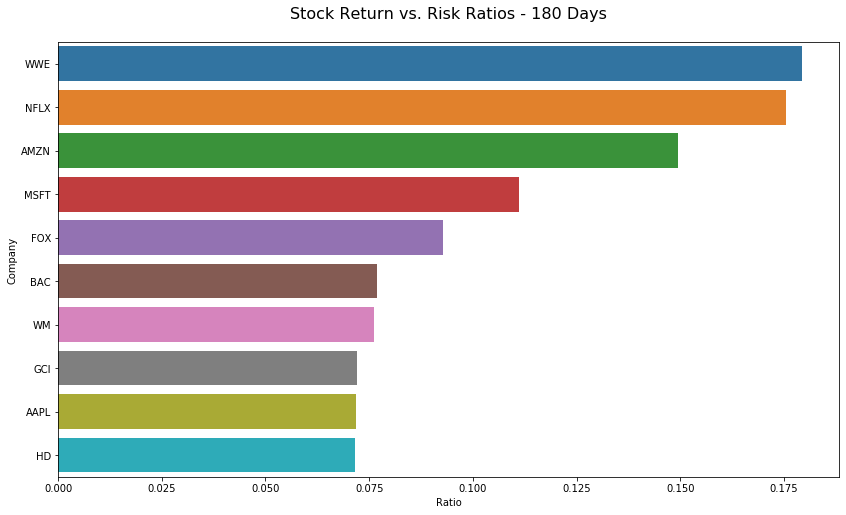

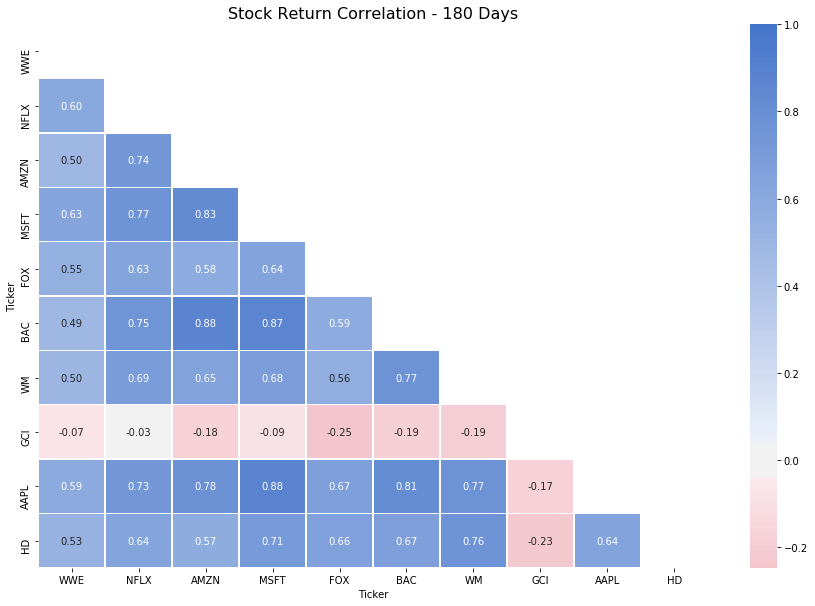

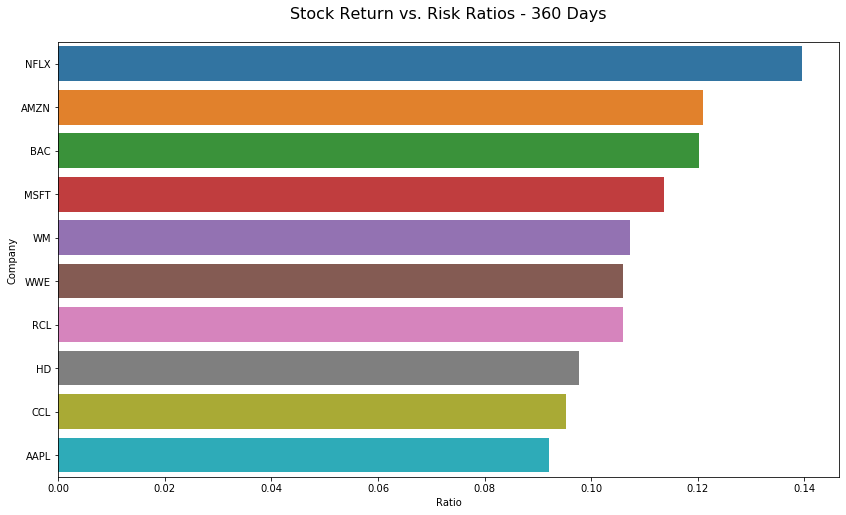

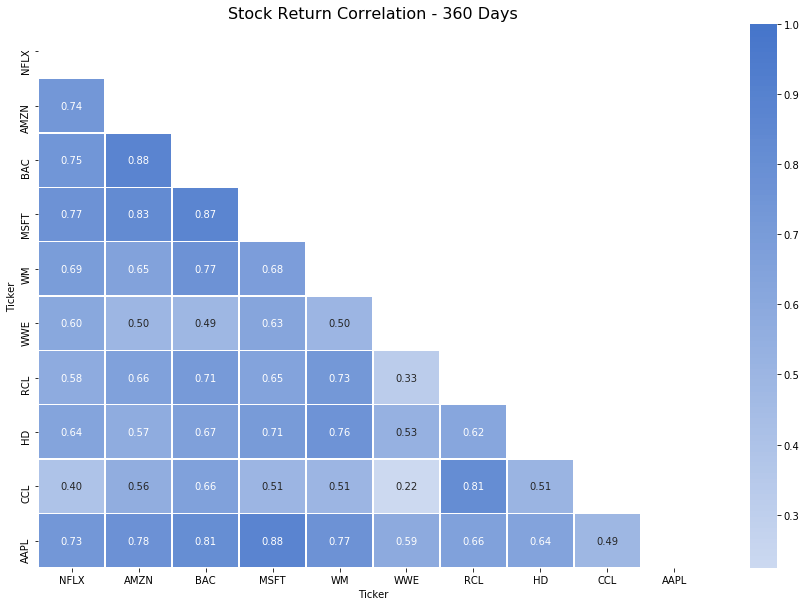

In [21]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def get_tickers(path):
    companies = pd.read_csv(path)
    ticker_list = list(companies['Ticker'])
    print('Retrieved', str(len(ticker_list)), 'ticker symbols.')
    return ticker_list

def get_prices(ticker):
    print('Retrieving data for', ticker)
    prices = quandl.get('WIKI/' + ticker)['Adj. Close'].reset_index()
    prices['Ticker'] = ticker
    return prices

def concat_pivot(data, rows, columns, values):
    df = pd.concat(data, sort=True)
    pivot = df.pivot_table(values=values, columns=columns, index=rows)
    return pivot

def compute_returns(df):
    returns = df.pct_change()
    return returns

def return_risk_ratio(df, days=30):
    means = pd.DataFrame(df.tail(days).mean())
    std = pd.DataFrame(df.tail(days).std())
    ratios = pd.concat([means, std], axis=1).reset_index()
    ratios.columns = ['Company', 'Mean', 'Std']
    ratios['Ratio'] = ratios['Mean']/ratios['Std']
    return ratios

def corr_matrix(df, days=30):
    corr_matrix = df.tail(days).corr()
    return corr_matrix

def barchart(df, x, y, length=8, width=14, title=""):
    df = df.sort_values(x, ascending=False)
    plt.figure(figsize=(width,length))
    chart = sns.barplot(data=df, x=x, y=y)
    plt.title(title + "\n", fontsize=16)
    return chart

def correlation_plot(corr, title=""):
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    plt.subplots(figsize=(15, 10))
    cmap = sns.diverging_palette(6, 255, as_cmap=True)
    
    chart = sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=.5, annot=True, fmt='.2f')
    plt.title(title, fontsize=16)
    return chart

def save_viz(chart, title):
    fig = chart.get_figure()
    fig.savefig(title + '.png')

def acquire():
    data = []

    ticker_list = get_tickers('/Users/erinberardi/Downloads/companies.csv')

    for ticker in ticker_list:
        prices = get_prices(ticker)
        data.append(prices)
    return data

def wrangle(data):
    pivot = concat_pivot(data, 'Date', 'Ticker', 'Adj. Close')
    returns = compute_returns(pivot)
    return returns

def analyze(returns, days=30):
    ratios = return_risk_ratio(returns, days=days)
    top10 = ratios.sort_values('Ratio', ascending=False).head(10)
    
    target_list = returns[list(top10['Company'])]
    correlation = corr_matrix(target_list)
    return top10, correlation

def report(top10, correlation):
    bar_plot = barchart(top10, 'Ratio', 'Company', title='Stock Return vs. Risk Ratios - ' + str(day) + ' Days')
    save_viz(bar_plot, 'Return vs. Risk Top 10 - ' + str(day) + ' Days')
    
    corr_plot = correlation_plot(correlation, title='Stock Return Correlation - ' + str(day) + ' Days')
    save_viz(corr_plot, 'Correlation Plot - ' + str(day) + ' Days')

if __name__ == "__main__":
    data = acquire()
    returns = wrangle(data)

    num_days = [90,180,360]

    for day in num_days:
        top10, correlation = analyze(returns, days=day)
        report(top10, correlation)
